# Predicting Employee Attrition

Throughout the course I have explored the problem of Predicting Employee Attrition defined as a classification task (Yes/No). At every module, I have presented my view of what would be the ML models that would be more suitable for this use case. Given the need to have a model that is highly explainable due to the highly-sensitive nature of employee personal data being used and the potential decisions impacting employees that would arise from use this model, I will use **Decision Trees** and **Logistic Regression** as models. In adittion, I will also use **SVMs** - although less explainable, can work well with non-linear problems. 

Due to the confidential nature of the data required, I have decided to use a publicly available dataset that was prepared by IBM and shared through Kaggle: [here](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

  <br>

## 1. Import libraries, load dataset, check data quality and Exploratory Data Analysis (EDA)

In [1]:
#Importing Python Packages and Lybraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Loading dataset and checking data quality

employee_df = pd.read_csv('IBM_employee_attrition_data.csv')
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#checking size of dataset, variable names and variable types
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#checking for null values
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
employee_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
#Drops employee ID and single value columns (no predicting power)

columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
employee_df = employee_df.drop(columns=columns_to_drop)

employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
#Replace 'Attrition' and 'Overtime' with integers 
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
#Summary of variables statistical description

employee_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: >

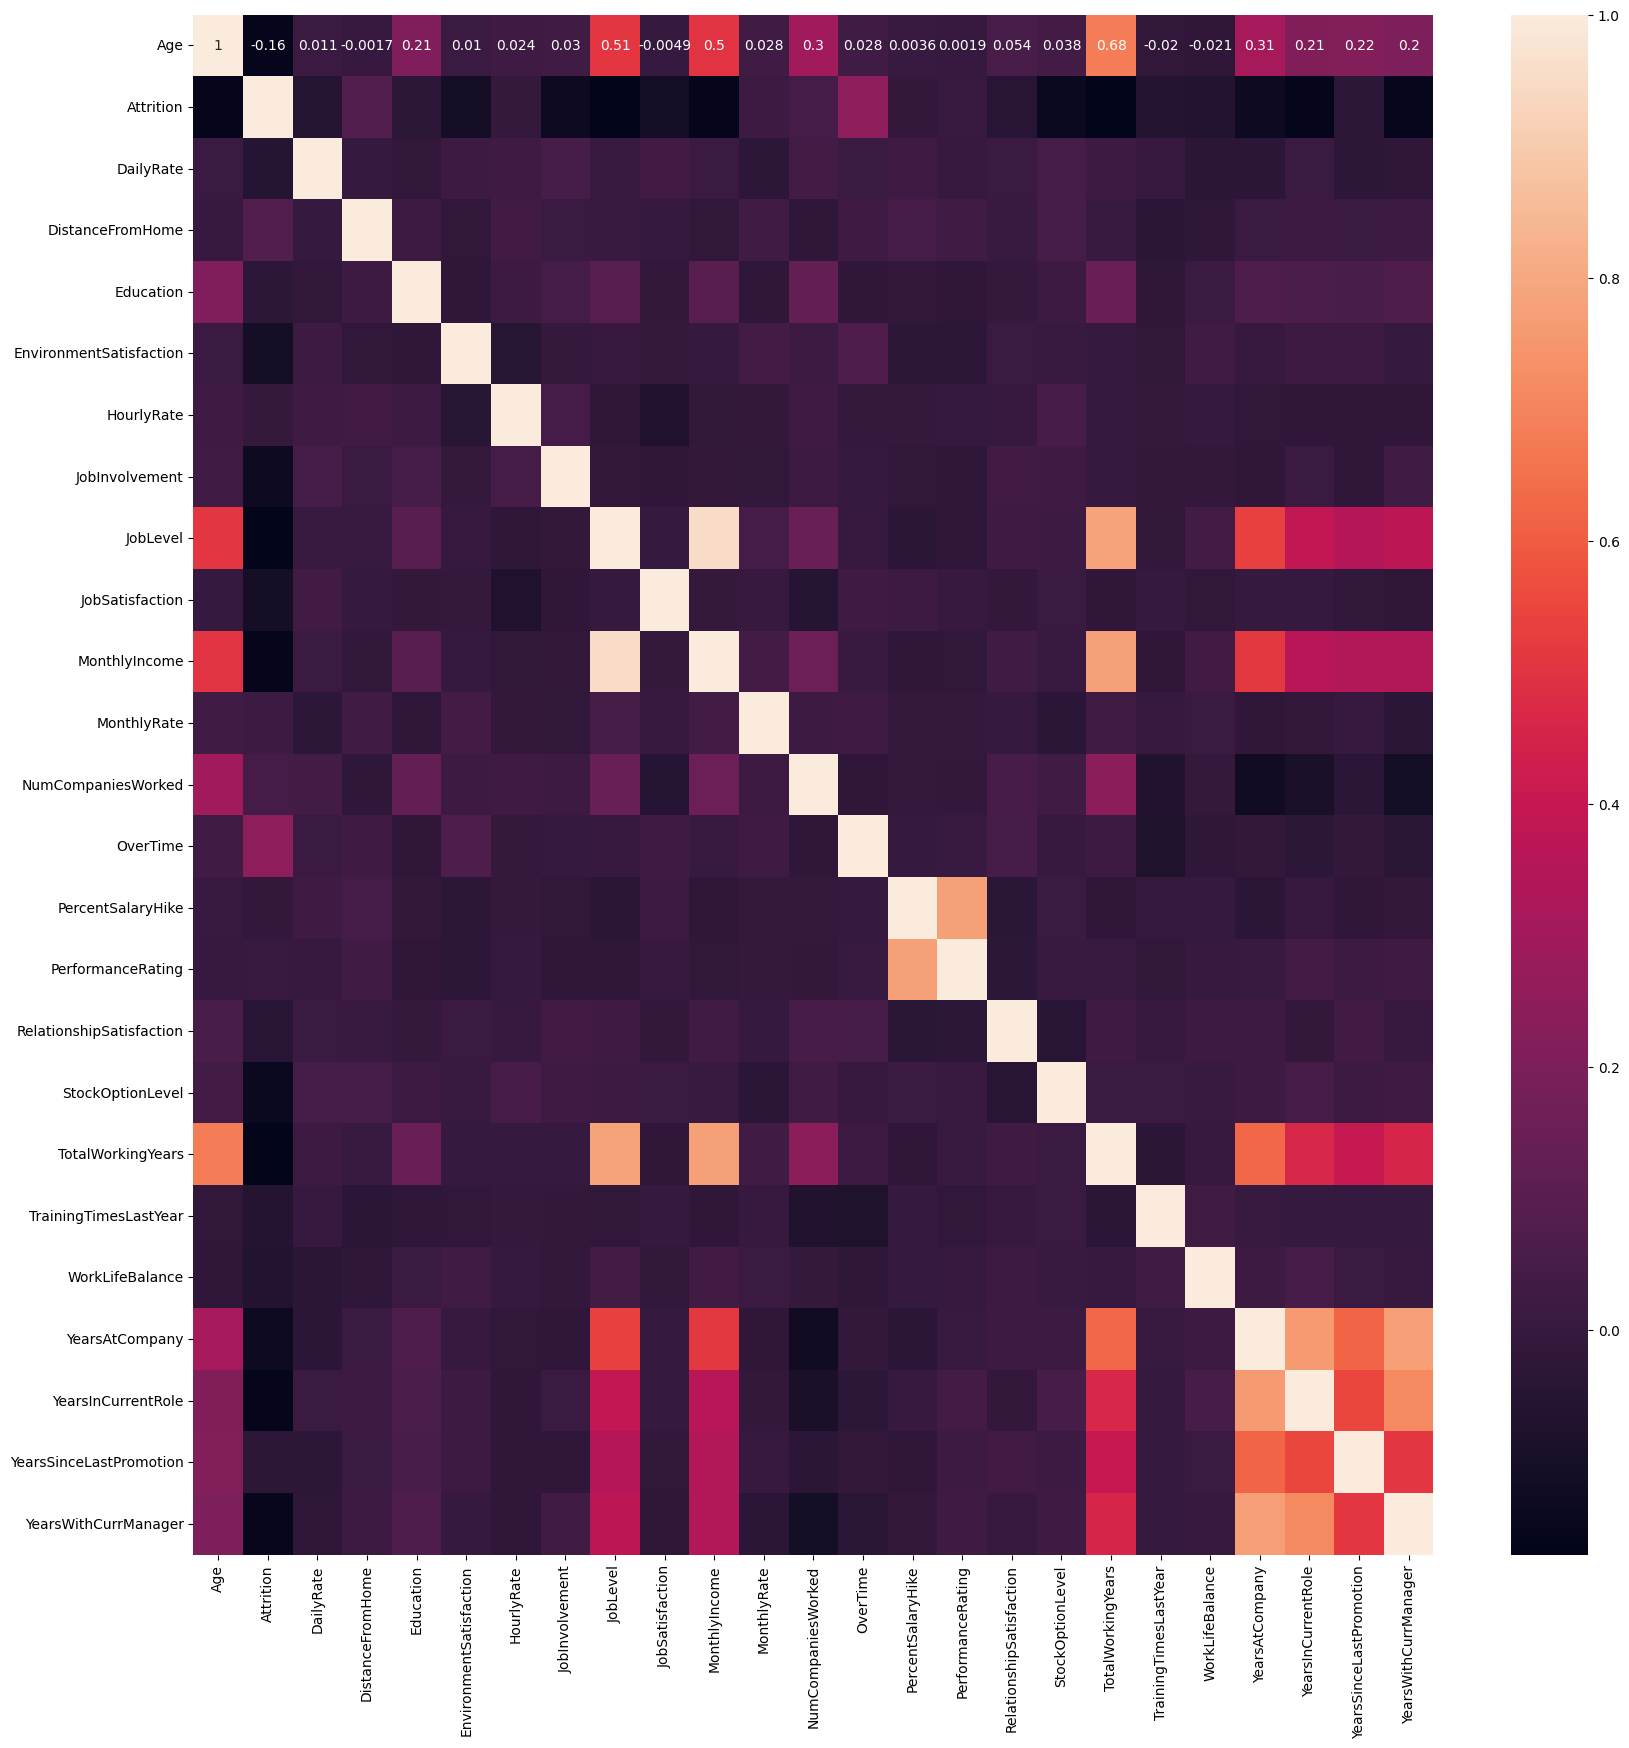

In [10]:
#correlation between variables

correlations = employee_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [11]:
#drop job level variable

employee_df = employee_df.drop(columns='JobLevel')
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [12]:
#Comparing stats of those who left vs stayed in the company

left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

print("Employees that left:", len(left_df))
print("Employees that stayed:", len(stayed_df))

left_df.describe()

Employees that left: 237
Employees that stayed: 1233


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,1.118058,3640.210367,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,2373.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,3.000000,3202.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,3.000000,5916.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19859.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [23]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.093277,4818.208001,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,3211.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,5204.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,4.000000,8834.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [13]:
#Calculates in each categorical input variable the number of leavers as a percentage of the total in each subcategory.
#This helps understand whether there are any clear areas within each variable where attrition is more prominent

#Input variables of interest
input_variables = ["Education","EducationField","NumCompaniesWorked","Gender","MaritalStatus","Department","JobRole", 
                   "JobInvolvement","BusinessTravel","OverTime", "WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
                   "RelationshipSatisfaction","PerformanceRating","TrainingTimesLastYear","PercentSalaryHike","StockOptionLevel",
                  ]

#Dictionary to store dataframes for each input variable
df_dict = {}

for input_variable in input_variables:
    df_inputVar = pd.DataFrame(columns=["Field", "% of Leavers"])
    i = 0
    for field in list(employee_df[input_variable].unique()):
        ratio = employee_df[(employee_df[input_variable] == field) & (employee_df['Attrition'] == 1)].shape[0] / employee_df[employee_df[input_variable] == field].shape[0]
        df_inputVar.loc[i] = (field, ratio * 100)
        i += 1  
    df_dict[input_variable] = df_inputVar.groupby(by="Field").sum()

for input_variable, df in df_dict.items():
    print(input_variable)
    print(df)
    print()
    
    

Education
       % of Leavers
Field              
1.0       18.235294
2.0       15.602837
3.0       17.307692
4.0       14.572864
5.0       10.416667

EducationField
                  % of Leavers
Field                         
Human Resources      25.925926
Life Sciences        14.686469
Marketing            22.012579
Medical              13.577586
Other                13.414634
Technical Degree     24.242424

NumCompaniesWorked
       % of Leavers
Field              
0.0       11.675127
1.0       18.809981
2.0       10.958904
3.0       10.062893
4.0       12.230216
5.0       25.396825
6.0       22.857143
7.0       22.972973
8.0       12.244898
9.0       23.076923

Gender
        % of Leavers
Field               
Female     14.795918
Male       17.006803

MaritalStatus
          % of Leavers
Field                 
Divorced     10.091743
Married      12.481426
Single       25.531915

Department
                        % of Leavers
Field                               
Human Resources   

__Inital findings:__
- Dataset composed of 34 input variables containing employee information both categorical and numerical and 1 output variable (Attrition) Yes/no. This will require label enconding for categorical variables.
- Dataset contains 1,470 employee records, all columns are complete (no nulls). This is unlikely to happen in a real case scenario where employee data is typically incomplete, hence affecting the quality of the dataset. In such scenario, one would have to fill-in the blanks (e.g. taking the average) to have a complete dataset for modelling.
- EmployeeNumber is a simple identifier. No predicting power, hence can me removed. Same applies to EmployeeCount, Over18, StandardHours with only one value across all records.
- Input variables have a varying scale (e.g. Daily rate rages between 102 to 1,499, while YearsAtCompany range between 0 to 40). Feature scale normalization will be applied to ensure scale does not impact relative importance of each variable. Also, looking at min/max values across variables it seems there are no outliers. Again, this will most likely not be the case when using a real data set. Outliers would have to be treated
- When looking at correlation between each input variable JobTitle and and MonthlySalary show a correlation factor close to 1, meaning they convey the same underlying information and therefore only one is required and Job title was dropped. This should avoid have model collinearity issues without losing any significant predicting capability.
- The dataset is imbalanced. 237 records of employees who left vs 1,233 of employees who stayed
- Comparing mean and std values for numberical variables between employees that left vs stayed shows that employees staying are typically older (mean of 38yo vs 34), have higher pay, work closer from home, have more years of experience and have been in with company and current role for longer
- When looking at % of leavers within each categorical variable:
    - __Experience/Education:__ higher share of leavers associated with lower levels of education, are also employees that tend to have worked with many companies before. Employees with HR, Marketing and Technical degrees with higher share of attrition.
    - __Personal:__ Male with slightly higher share, as well as employees who are single (2-2.5x more those who are married/divorced)
    - __Job:__ HR and Sales departments with higher share. Sales reps by far the role with highest attrition levels
    - __Work arrangements:__ employees who travel frequently, work overtime and have low perception of work life balance show higher share of attrition
    - __Sentiment:__ lower levels of satisfaction associated with higher levels of attrition

## 2. Data pre-processing (encoding, scaling and splitting)

In [14]:
#Encoding: converts categorical input variables into numerical variables. First converts categorical variables with 
#up to 2 unique values with LabelEncoder and then uses get_dummies for remaining variables

le = LabelEncoder()

for col in employee_df.columns[1:]:
    if employee_df[col].dtype == 'object':
        if len(list(employee_df[col].unique())) <= 2:
            le.fit(employee_df[col])
            employee_df[col] = le.transform(employee_df[col])
            

employee_df = pd.get_dummies(employee_df, drop_first=True)



#Scaling: to normalize the input variables so that impact of variables with wide rage of values (e.g. age, salary), 
#don't overshadow variables with small scale (e.g. yes/no, 1/0)

#First split dataset into input x and output y
y = employee_df['Attrition'].copy()
x = employee_df.drop(columns='Attrition')

#MinMaxScaler used so that variable distribution is not distorted after scaling
scaler = MinMaxScaler(feature_range=(0, 1))
x_col = list(x.columns)
for col in x_col:
    x[col] = x[col].astype(float)
    x[[col]] = scaler.fit_transform(x[[col]])
    
    

#Lastly, split data into training and test sets. Given the imbalanced dataset (number of Attrition=1 much 
#lower than Attrition = 0), the train_test_split function is set with stratify = y to ensure proportions are maintained

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y) 


## 3. Modelling
### 3.1 Logistic Regression

In [15]:
# simple Logistic Regression to set baseline

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred,))
print('\nClassification Report\n',classification_report(y_test, y_pred))


Confusion Matrix
 [[241   6]
 [ 31  16]]

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.73      0.34      0.46        47

    accuracy                           0.87       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294



In [15]:
#To improve the model, will use cross-validation combined with Gridsearch for hyperparameter tuning.
#Given the data imbalance, will use f1_weighted scoring to assess model performance. 
#Accuracy is not a viable metric due to class imbalance.


#Define the model. liblinear solver used (suitable for smaller datasets and compatible with l1 and l2 penalties)
#Also defined class_weight to balanced to give more weight to the under represented class 1
model = LogisticRegression(solver='liblinear', class_weight="balanced")

#Define parameter grid
param_grid = {
            'C': np.arange(0.01, 5, 0.01),
            'penalty': ['l1', 'l2'],
            }

#Run tuning with crossvalidation. StratifiedKfold used to ensure same class proportions as in original dataset
grid_search_lreg = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', 
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)

#Fit the model
grid_search_lreg.fit(X_train, y_train)

best_estimator_lreg = grid_search_lreg.best_estimator_
best_estimator_lreg.fit(X_train, y_train)

y_pred_tuned_lreg = best_estimator_lreg.predict(X_test)


#Print best parameters and score
print("Best parameters: ", grid_search_lreg.best_params_)
print("Best score: ", grid_search_lreg.best_score_)
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_tuned_lreg))
print('\nClassification Report\n',classification_report(y_test, y_pred_tuned_lreg))

Best parameters:  {'C': 0.09, 'penalty': 'l2'}
Best score:  0.7949202773129076
Confusion Matrix
 [[203  44]
 [ 13  34]]

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       247
           1       0.44      0.72      0.54        47

    accuracy                           0.81       294
   macro avg       0.69      0.77      0.71       294
weighted avg       0.86      0.81      0.82       294



### 3.2 SVM

In [36]:
#Define the model
model = svm.SVC(class_weight="balanced")

#Define parameter grid
param_grid = {
            'C': np.arange(0.01, 1, 0.02),
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': np.arange(0.01, 1, 0.02)
            }

#Run tuning with crossvalidation. StratifiedKfold used to ensure same class proportions as in original dataset
grid_search_svm = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', 
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)

#Fit the model
grid_search_svm.fit(X_train, y_train)

best_estimator_svm = grid_search_svm.best_estimator_
best_estimator_svm.fit(X_train, y_train)

y_pred_tuned_svm = best_estimator_svm.predict(X_test)


#Print best parameters and score
print("Best parameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_tuned_svm))
print('\nClassification Report\n',classification_report(y_test, y_pred_tuned_svm))

Best parameters:  {'C': 0.44999999999999996, 'gamma': 0.38999999999999996, 'kernel': 'rbf'}
Best score:  0.8448956054338023
Confusion Matrix
 [[220  27]
 [ 22  25]]

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       247
           1       0.48      0.53      0.51        47

    accuracy                           0.83       294
   macro avg       0.69      0.71      0.70       294
weighted avg       0.84      0.83      0.84       294



### 3.3 Decision Trees

In [19]:
# simple Decision Tree Classifier to set baseline

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Confusion Matrix\n', confusion_matrix(y_test, y_pred,))
print('\nClassification Report\n',classification_report(y_test, y_pred))

Confusion Matrix
 [[208  39]
 [ 30  17]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       247
           1       0.30      0.36      0.33        47

    accuracy                           0.77       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.78      0.77      0.77       294



#### 3.3.1 Random Forest

In [39]:
#Define the model
model = RandomForestClassifier(class_weight="balanced")

#Define parameter grid
param_grid = {
            'n_estimators': np.arange(1, 200, 20),
            'max_depth': np.arange(1, 10, 1),
            'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8]
            }


#Run tuning with crossvalidation. StratifiedKfold used to ensure same class proportions as in original dataset
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', 
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)

#Fit the model
grid_search_rf.fit(X_train, y_train)

best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train, y_train)

y_pred_tuned_rf = best_estimator_rf.predict(X_test)


#Print best parameters and score
print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_tuned_rf))
print('\nClassification Report\n',classification_report(y_test, y_pred_tuned_rf))

Best parameters:  {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 181}
Best score:  0.8511020542031309
Confusion Matrix
 [[226  21]
 [ 30  17]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.45      0.36      0.40        47

    accuracy                           0.83       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.81      0.83      0.82       294



#### 3.3.2 Gradient Boosting

In [38]:
#Define the model
model = GradientBoostingClassifier()

#Define parameter grid
param_grid = {
            'n_estimators': np.arange(1, 200, 20),
            'max_depth': np.arange(1, 10, 1),
            'learning_rate': np.arange(0.1, 1, 0.1),
            'min_samples_leaf': [2, 3, 4, 5]
            }


#Run tuning with crossvalidation. StratifiedKfold used to ensure same class proportions as in original dataset
grid_search_gd = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', 
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)

#Fit the model
grid_search_gd.fit(X_train, y_train)

best_estimator_gd = grid_search_gd.best_estimator_
best_estimator_gd.fit(X_train, y_train)

y_pred_tuned_gd = best_estimator_gd.predict(X_test)


#Print best parameters and score
print("Best parameters: ", grid_search_gd.best_params_)
print("Best score: ", grid_search_gd.best_score_)
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_tuned_gd))
print('\nClassification Report\n',classification_report(y_test, y_pred_tuned_gd))

Best parameters:  {'learning_rate': 0.9, 'max_depth': 1, 'min_samples_leaf': 2, 'n_estimators': 181}
Best score:  0.8827887612966894
Confusion Matrix
 [[239   8]
 [ 31  16]]

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       247
           1       0.67      0.34      0.45        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



### 3.4 Feature Importance

In [17]:
#For the best performing model (Logistic regression), below shows the most important features

coefficients_lreg = best_estimator_lreg.coef_[0]
importance_df_lreg = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lreg})
importance_df_lreg = importance_df_lreg.sort_values(by='Coefficient', ascending=False)

print("Top 10 (positive)", importance_df_lreg.head(10))
print("\nTop 10 (negative)", importance_df_lreg.tail(10))


Top 10 (positive)                              Feature  Coefficient
12                          OverTime     1.154621
34     JobRole_Laboratory Technician     0.837896
24  BusinessTravel_Travel_Frequently     0.829009
42              MaritalStatus_Single     0.671877
11                NumCompaniesWorked     0.661691
2                   DistanceFromHome     0.595726
40      JobRole_Sales Representative     0.538133
22           YearsSinceLastPromotion     0.451794
27                  Department_Sales     0.395837
33           JobRole_Human Resources     0.323084

Top 10 (negative)                       Feature  Coefficient
1                   DailyRate    -0.373149
16           StockOptionLevel    -0.392917
21         YearsInCurrentRole    -0.411052
37  JobRole_Research Director    -0.412113
23       YearsWithCurrManager    -0.513073
17          TotalWorkingYears    -0.516033
8             JobSatisfaction    -0.575871
7              JobInvolvement    -0.590255
0                         

__Concluding remarks:__
- Logistic regreassion, SVM and Decision Trees (Random Forest and Gradient Boosting) modelled and tuned based on a range of 2-4 hyperparameters based aiming at maximizing models F1 scores (weighted). F1 score (weighted) was used as performance metric  as it accounts for precision and recall in a situation of class imbalance. Accuracy would not be an appropriate metric as it is typically used in situations where both classes have equal importance, whereas in attrition prediction we are interested in predicting outcomes associated with the minority class (meaning Attrition = 1 / Yes)
- Out of the models tested, the best performing model turned out to be the logistic regression with an F1 score of 0.54 (the simplest of the 3 models tested). This is rather surprising, as one would have expect that this problem involves non-linear relatioships among varibles, where tree ensembles tend to perform better. 
- Having said that, an F1 score is still rather low for what it would be considered good enought model performance (say >0.70). This can be for 2 main reasons: (1) Feature selection would need to be refined. As a next step, one would now deep-dive into the Feature Importance analyis in 3.4 and assess what features are relevant, remove redundant ones and work with the business to enrich the data set with new variables, and (2) the data set is rather small - 1,400 records with class 1 only accounting for 16% of the total. It would be approriated to collect more data as the models would benefit for training with larger datasets. Acting on (1) and (2) would potentially bring F1 score higher, especially for the decision tree models.
- Looking at confusion matrixes of the different models, the Logistic Regression does a better job at classifiying a higher number of true positives, while reducing the number of False Negatives, which in this scenario one would want to minimize. However, the trade-off is that this result is achieved at the expense of a larger number of False Positives. While the model can still be improved and both precision and recall can be refined, in a scenario where this trade-off remains, it will come down to a business decision to define the level of False Positives that would be acceptable to ensure high risk profiles are identified.